In [ ]:
# Import the Liberaries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Load the data from the csv
df = pd.read_csv('customer_segmentation.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [ ]:
# Basic information about the data set 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB
None


In [ ]:
# Describe the data set 
print(df.describe())

                  ID           Age  Work_Experience   Family_Size
count   10695.000000  10695.000000      9597.000000  10247.000000
mean   463468.088640     43.511828         2.619777      2.844052
std      2600.966411     16.774158         3.390790      1.536427
min    458982.000000     18.000000         0.000000      1.000000
25%    461220.500000     30.000000         0.000000      2.000000
50%    463451.000000     41.000000         1.000000      3.000000
75%    465733.500000     53.000000         4.000000      4.000000
max    467974.000000     89.000000        14.000000      9.000000


In [ ]:
# Checking  missing values
print(df.isnull().sum())

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64


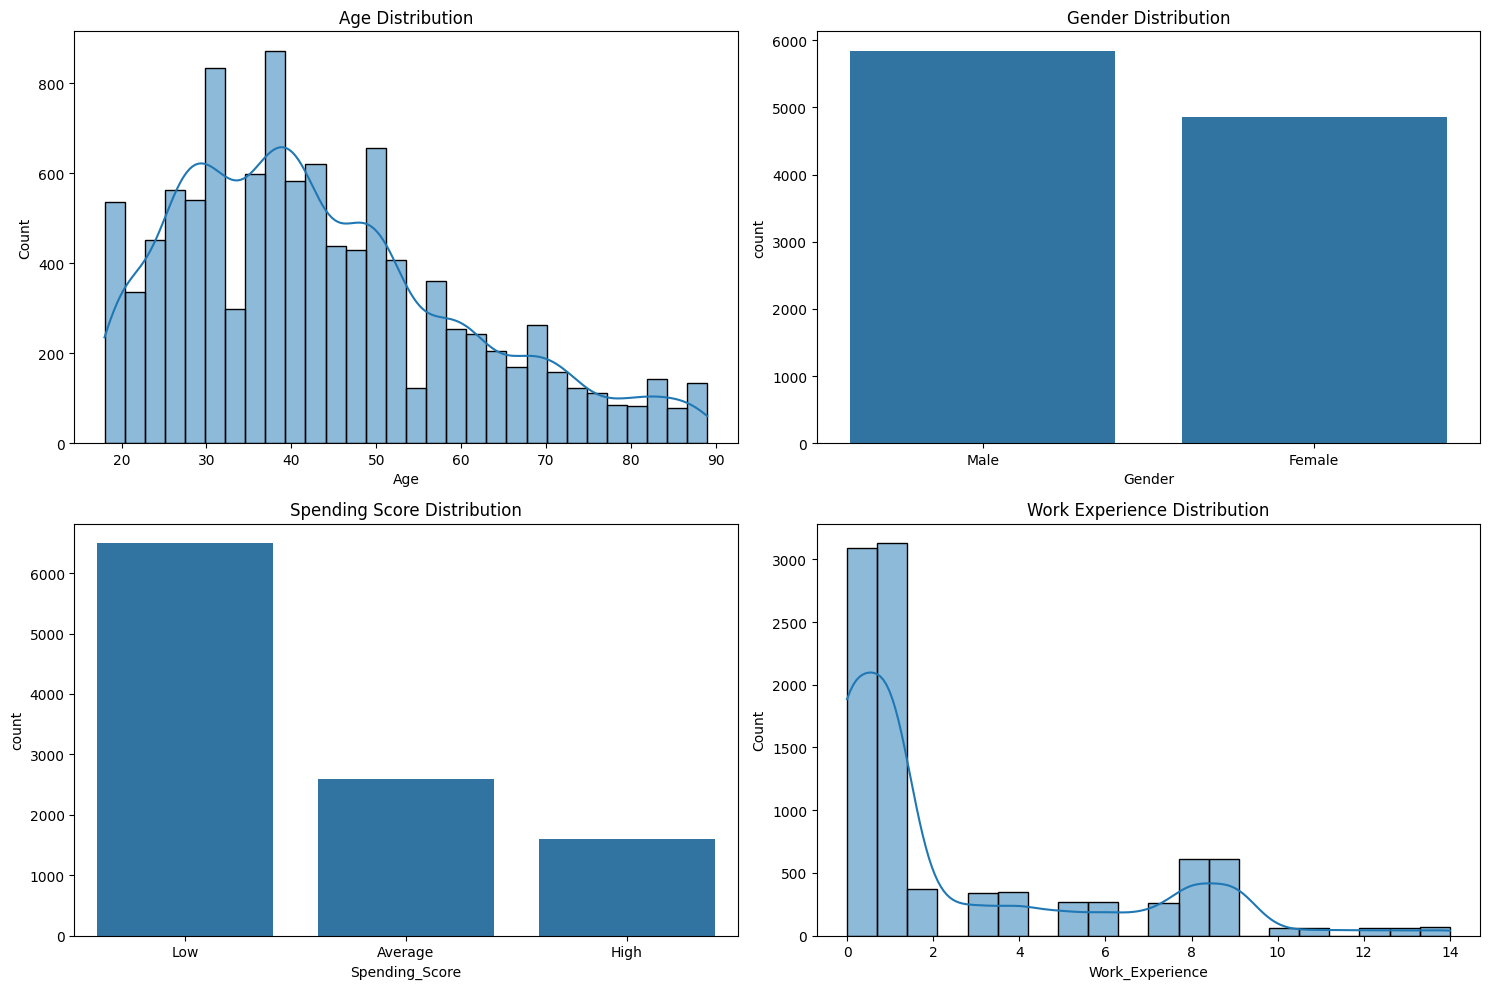

In [7]:
# Visualize distributions
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Spending_Score', data=df)
plt.title('Spending Score Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['Work_Experience'].dropna(), bins=20, kde=True)
plt.title('Work Experience Distribution')

plt.tight_layout()
plt.show()

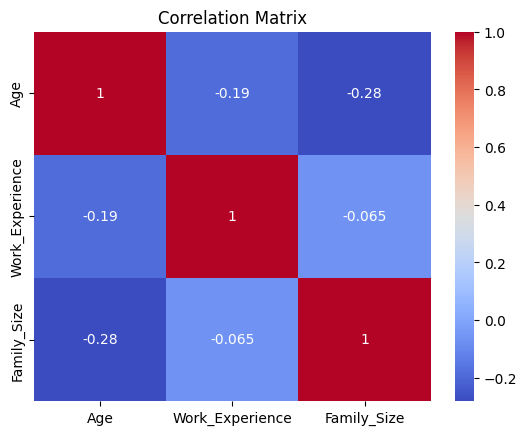

In [8]:
# Correlation analysis
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Data Preprocessing


df['Work_Experience'].fillna(df['Work_Experience'].median(), inplace=True)
df['Family_Size'].fillna(df['Family_Size'].median(), inplace=True)


features = ['Age', 'Spending_Score', 'Work_Experience', 'Family_Size']


spending_score_map = {'Low': 0, 'Average': 1, 'High': 2}
df['Spending_Score_Num'] = df['Spending_Score'].map(spending_score_map)


X = df[['Age', 'Spending_Score_Num', 'Work_Experience', 'Family_Size']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\HP\AppData\Local\Temp\ipykernel_6804\3734852437.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience'].fillna(df['Work_Experience'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6804\3734852437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [11]:
# K-Means Clustering

# Apply K-Means with optimal clusters (let's assume 4 based on analysis)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Spending_Score_Num': 'mean',
    'Work_Experience': 'mean',
    'Family_Size': 'mean',
    'Gender': lambda x: x.mode()[0],
    'Profession': lambda x: x.mode()[0]
}).reset_index()

print(cluster_analysis)

   Cluster        Age  Spending_Score_Num  Work_Experience  Family_Size  \
0        0  47.656452            0.110645         0.946774     1.665484   
1        1  56.225246            1.483934         1.228852     3.094426   
2        2  36.892549            0.352762         8.432843     2.457679   
3        3  28.517885            0.092535         1.134914     4.291213   

   Gender  Profession  
0    Male      Artist  
1    Male      Artist  
2  Female      Artist  
3    Male  Healthcare  


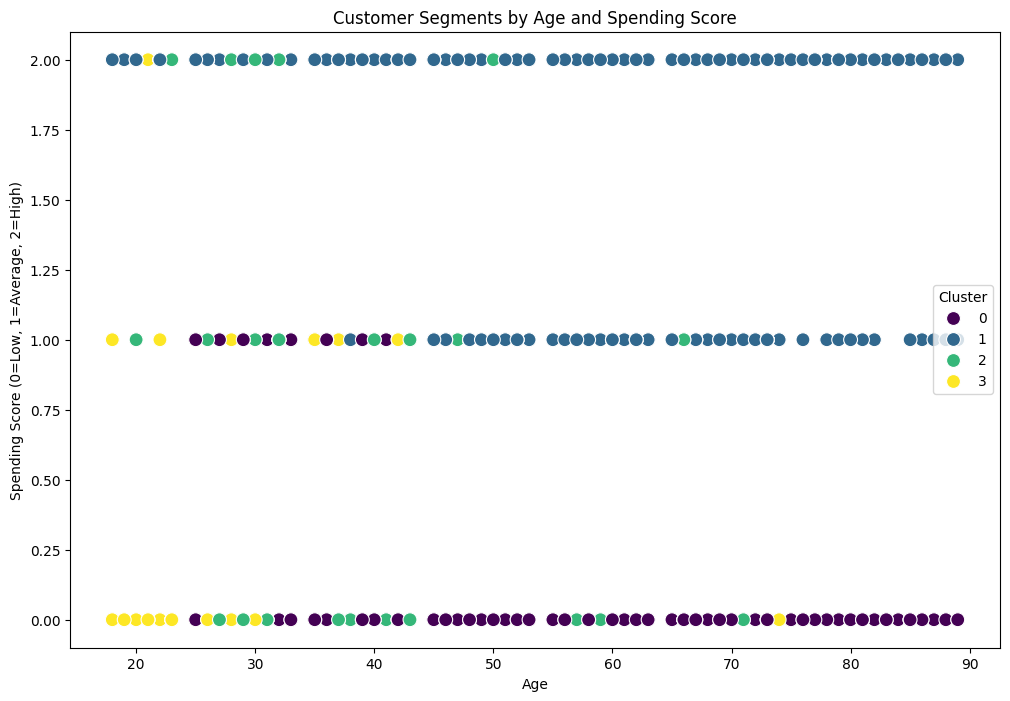

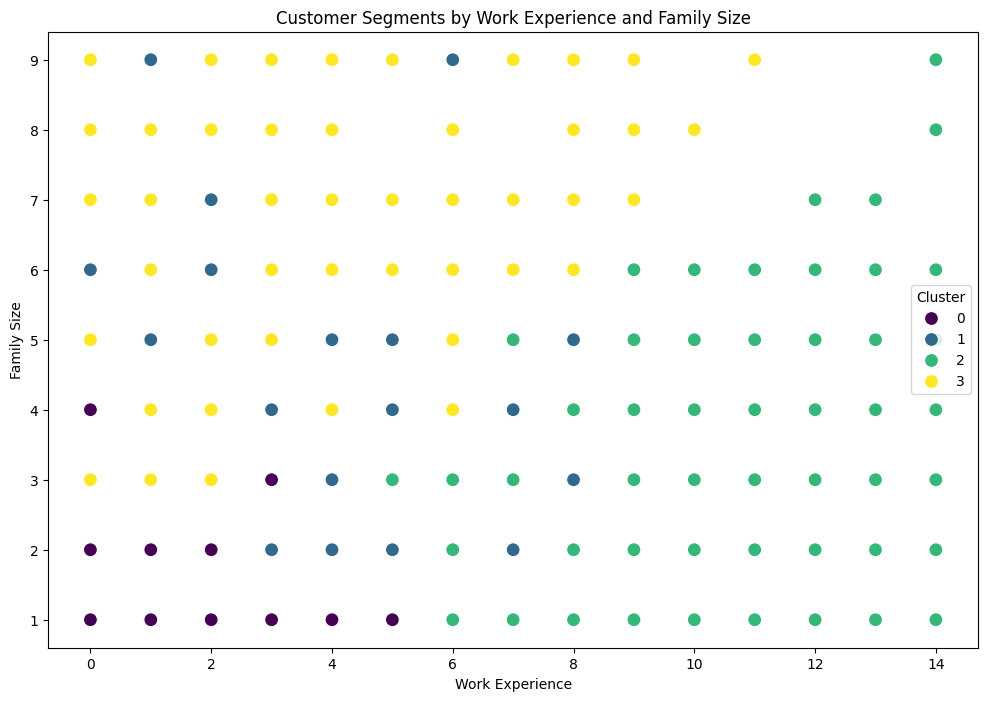

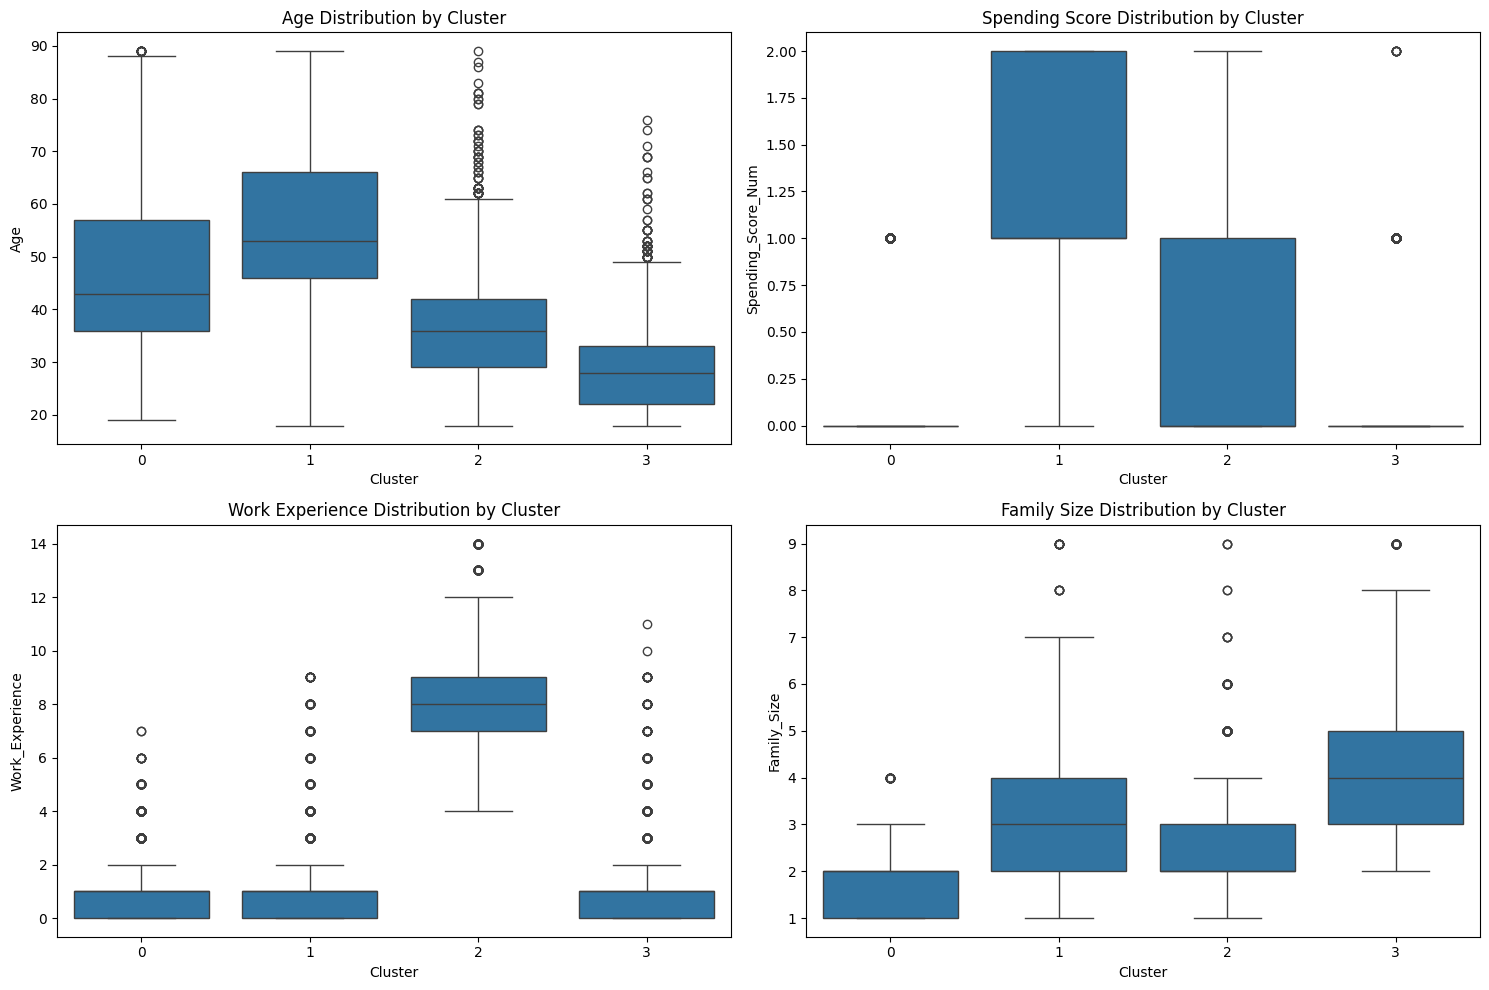

In [12]:
# Visualization of Clusters

# Visualize clusters based on Age and Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending_Score_Num', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments by Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (0=Low, 1=Average, 2=High)')
plt.show()

# Visualize clusters based on Work Experience and Family Size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Work_Experience', y='Family_Size', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments by Work Experience and Family Size')
plt.xlabel('Work Experience')
plt.ylabel('Family Size')
plt.show()

# Boxplots for each cluster
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cluster', y='Spending_Score_Num', data=df)
plt.title('Spending Score Distribution by Cluster')

plt.subplot(2, 2, 3)
sns.boxplot(x='Cluster', y='Work_Experience', data=df)
plt.title('Work Experience Distribution by Cluster')

plt.subplot(2, 2, 4)
sns.boxplot(x='Cluster', y='Family_Size', data=df)
plt.title('Family Size Distribution by Cluster')

plt.tight_layout()
plt.show()